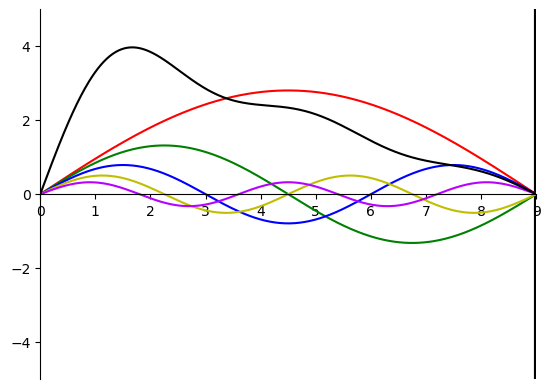

In [2]:
# https://www.acs.psu.edu/drussell/Demos/Pluck-Fourier/Pluck-Fourier.html#:~:text=Motion%20of%20the%20Plucked%20String&text=The%20frequency%20associated%20with%20the,motion%20384%20times%20every%20second.
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()

N = 5
c = 0.3
L = 9
h = 4
d = 1

# set the axes
ax.set_xlim(0, L)
ax.set_ylim(-h-1, h+1)
# hide the extra 2 axes
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")
# set the axes origion point
ax.spines["bottom"].set_position(("data", 0))
ax.spines["left"].set_position(("data", 0))

x_temp = np.linspace(L, L, 100)
y_temp = np.linspace(-h-1, h+1, 100)
plt.plot(x_temp, y_temp, 'k-',linewidth=3)

x1 = np.linspace(0, L, 500)
y1 = []
for i in range(len(x1)):
    if x1[i] < 0:
        y1.append(x1[i])
    else:
        y1.append(h-(h/L)*x1[i])

y1 = np.array(y1)

# Motion of Plucked String
def update(frame):
    x = np.linspace(0, L, 500)
    y = []
    for n in range(N):
        y.append([])
    for i in range(len(x)):
        a = []
        for n in range(1,N+1):
            temp = 2*h*(L**2)*np.sin(d*n*np.pi/L)/(d*(L-d)*((np.pi*n)**2))*np.sin(n*np.pi*x[i]/L)*np.cos(c*np.pi*n*frame/L)
            a.append(temp)
            y[n-1].append(temp)

    y = np.array(y)
    line1.set_data(x, y[0])
    line2.set_data(x, y[1])
    line3.set_data(x, y[2])
    line4.set_data(x, y[3])
    line5.set_data(x, y[4])
    line_all.set_data(x, y.sum(axis=0))
    return line1, line2, line3, line4, line5, line_all

line1, = ax.plot([], [], "r-")
line2, = ax.plot([], [], "g-")
line3, = ax.plot([], [], "b-")
line4, = ax.plot([], [], "y-")
line5, = ax.plot([], [], color="#b800ff")
line_all, = ax.plot([], [], "k-")


ani = FuncAnimation(fig, update, frames=2000, interval=200, blit=True)

plt.show()